In [1]:
!pip install rdkit-pypi --no-deps --force-reinstall

  Using cached rdkit_pypi-2022.9.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.9 kB)
Using cached rdkit_pypi-2022.9.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (29.4 MB)
  Attempting uninstall: rdkit-pypi
    Found existing installation: rdkit-pypi 2022.9.5
    Uninstalling rdkit-pypi-2022.9.5:
      Successfully uninstalled rdkit-pypi-2022.9.5


Original SMILES: FC=C=N
Original SELFIES: [F][C][=C][=N]
Mutated SMILES: FC=C=( → valido? False
Mutated SELFIES: [F][C][=C][=N] → valido? True


[10:43:51] SMILES Parse Error: syntax error while parsing: FC=C=(
[10:43:51] SMILES Parse Error: Failed parsing SMILES 'FC=C=(' for input: 'FC=C=('


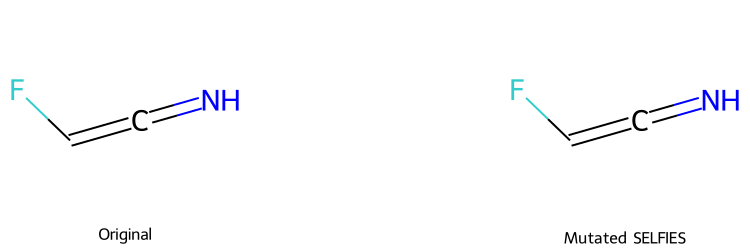

In [6]:

# --- Sezione installazione librerie (esegui solo la prima volta) ---
!pip install selfies  -q

# --- Codice per il confronto e visualizzazione ---
import random
import selfies as sf
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.rdBase import BlockLogs
from IPython.display import display

BlockLogs()

# Molecola iniziale
original_smiles = "FC=C=N"
print("Original SMILES:", original_smiles)

# Converti a SELFIES
original_selfies = sf.encoder(original_smiles)
print("Original SELFIES:", original_selfies)

# Funzione: mutazione casuale
def mutate_string(s, charset):
    if not s:
        return s
    s_list = list(s)
    pos = random.randint(0, len(s_list) - 1)
    s_list[pos] = random.choice(charset)
    return ''.join(s_list)

# Charset SMILES semplificato
smiles_charset = list("CNOF=#:()123")

# Charset SELFIES
selfies_alphabet = list(sf.get_alphabet_from_selfies([original_selfies]))

# Mutazione SMILES
mutated_smiles = mutate_string(original_smiles, smiles_charset)
mol_mutated_smiles = Chem.MolFromSmiles(mutated_smiles)
print("Mutated SMILES:", mutated_smiles, "→ valido?", mol_mutated_smiles is not None)

# Mutazione SELFIES
selfies_tokens = list(sf.split_selfies(original_selfies)) # Convert the generator to a list
pos = random.randint(0, len(selfies_tokens) - 1)
selfies_tokens[pos] = random.choice(selfies_alphabet)
mutated_selfies = "".join(selfies_tokens)
mutated_selfies_decoded = sf.decoder(mutated_selfies)
mol_mutated_selfies = Chem.MolFromSmiles(mutated_selfies_decoded)
print("Mutated SELFIES:", mutated_selfies, "→ valido?", mol_mutated_selfies is not None)

# Molecole da visualizzare
mol_original = Chem.MolFromSmiles(original_smiles)
mol_list = [mol_original,
            mol_mutated_smiles if mol_mutated_smiles else None,
            mol_mutated_selfies]

titles = ["Original", "Mutated SMILES", "Mutated SELFIES"]
img = Draw.MolsToGridImage(mol_list, molsPerRow=3, subImgSize=(250, 250), legends=titles)

display(img)

In [7]:

# Mutazione SELFIES
selfies_tokens = list(sf.split_selfies(original_selfies)) # Convert the generator to a list
pos = random.randint(0, len(selfies_tokens) - 1)
selfies_tokens[pos] = random.choice(selfies_alphabet)
mutated_selfies = "".join(selfies_tokens)
mutated_selfies_decoded = sf.decoder(mutated_selfies)
mol_mutated_selfies = Chem.MolFromSmiles(mutated_selfies_decoded)
print("Mutated SELFIES:", mutated_selfies, "→ valido?", mol_mutated_selfies is not None)

Mutated SELFIES: [F][C][=C][C] → valido? True
